In [57]:
import os
import numpy as np
import geopandas
import pandas as pd
import ast
from shapely import geometry
from shapely import wkt
from shapely.ops import cascaded_union
import matplotlib.pyplot as plt
import folium
from sklearn.cluster import DBSCAN
from dateutil.parser import parse
import datetime
from rtree import index
from data_func import *
from data_func_2 import *

import datetime 

# from mpl_toolkits.basemap import Basemap
%matplotlib inline  
import warnings
import matplotlib.cbook
warnings.filterwarnings("ignore",category=matplotlib.cbook.mplDeprecation)

path = "/Users/macbook/DataANZ/ANZData.xlsx"
ANZ_df = pd.read_excel(path)
ANZ_df.set_index('transaction_id', inplace = True)
ANZ_df['weekday'] = ANZ_df['date'].dt.day_name()


In [58]:
ANZ_df.tail()

,status,card_present_flag,bpay_biller_code,account,currency,long_lat,txn_description,merchant_id,merchant_code,first_name,...,age,merchant_suburb,merchant_state,extraction,amount,country,customer_id,merchant_long_lat,movement,weekday
transaction_id,,,,,,,,,,,,,,,,,,,,,
f2e3e695c2ee4c50a4c8747f852cbe2e,authorized,0.0,NaN,ACC-3021093232,AUD,149.83 -29.47,POS,32aa73dc-b7c2-4161-b14d-6271b96ce792,NaN,Melissa,...,30,Ringwood,VIC,2018-10-31T23:09:06.000+0000,9.79,Australia,CUS-55310383,145.23 -37.81,debit,Wednesday
56e147e5485f4683b9076fcaaed76640,authorized,1.0,NaN,ACC-1608363396,AUD,151.22 -33.87,SALES-POS,296a0500-8552-48ac-ac81-ec37065b568e,NaN,Robert,...,20,Casula,NSW,2018-10-31T23:21:46.000+0000,63.87,Australia,CUS-2688605418,150.88 -33.96,debit,Wednesday
2fdd4681827343f6af2e6519644a684a,authorized,1.0,NaN,ACC-3827517394,AUD,151.12 -33.89,POS,e5975ab4-08f7-4725-a369-24cc0e35ed6e,NaN,Craig,...,28,Kings Park,NSW,2018-10-31T23:34:25.000+0000,43.96,Australia,CUS-2663907001,150.92 -33.74,debit,Wednesday
74aa9cd7e4af4c6d9cd7dbd28e9aedc9,authorized,1.0,NaN,ACC-2920611728,AUD,144.96 -37.76,SALES-POS,af49051a-591d-4b08-bd3c-27730b70ed37,NaN,Tyler,...,69,Oakleigh,VIC,2018-10-31T23:47:05.000+0000,30.77,Australia,CUS-1388323263,145.09 -37.91,debit,Wednesday
6d5218e04e8040b9996850ce11a19426,authorized,1.0,NaN,ACC-1443681913,AUD,150.92 -33.77,SALES-POS,f31f4b14-2040-40ec-a120-b141bb274cbd,NaN,Ryan,...,31,Mascot,NSW,2018-10-31T23:59:44.000+0000,22.36,Australia,CUS-3129499595,151.19 -33.93,debit,Wednesday


In [4]:
ANZ_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12043 entries, 0 to 12042
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   status             12043 non-null  object        
 1   card_present_flag  7717 non-null   float64       
 2   bpay_biller_code   885 non-null    object        
 3   account            12043 non-null  object        
 4   currency           12043 non-null  object        
 5   long_lat           12043 non-null  object        
 6   txn_description    12043 non-null  object        
 7   merchant_id        7717 non-null   object        
 8   merchant_code      883 non-null    float64       
 9   first_name         12043 non-null  object        
 10  balance            12043 non-null  float64       
 11  date               12043 non-null  datetime64[ns]
 12  gender             12043 non-null  object        
 13  age                12043 non-null  int64         
 14  mercha

In [5]:
ANZ_df.index.values

array([    0,     1,     2, ..., 12040, 12041, 12042])

In [6]:
ANZ_df.shape

(12043, 23)

In [21]:
ANZ_df.status.value_counts()

authorized    7717
posted        4326
Name: status, dtype: int64

In [22]:
ANZ_df.currency.value_counts()


AUD    12043
Name: currency, dtype: int64

In [34]:
ANZ_df.card_present_flag.unique()

array([ 1.,  0., nan])

In [24]:
ANZ_df.bpay_biller_code.value_counts()

0                                        883
 THE DISCOUNT CHEMIST GROUP                1
 LAND WATER & PLANNING East Melbourne      1
Name: bpay_biller_code, dtype: int64

In [25]:
ANZ_df.long_lat.value_counts()

153.41 -27.95    578
151.23 -33.94    303
116.06 -32.00    292
145.45 -37.74    260
153.10 -27.66    259
                ... 
149.03 -35.25     40
149.19 -21.15     37
145.09 -37.82     34
130.98 -12.49     31
147.61 -37.82     25
Name: long_lat, Length: 100, dtype: int64

In [26]:
ANZ_df.txn_description.value_counts()

SALES-POS     3934
POS           3783
PAYMENT       2600
PAY/SALARY     883
INTER BANK     742
PHONE BANK     101
Name: txn_description, dtype: int64

In [27]:
ANZ_df.merchant_code.value_counts()

0.0    883
Name: merchant_code, dtype: int64

In [20]:
ANZ_df.movement.value_counts()

debit     11160
credit      883
Name: movement, dtype: int64

In [28]:
ANZ_df.country.value_counts()

Australia    12043
Name: country, dtype: int64

In [29]:
ANZ_df.merchant_state.value_counts()

NSW    2169
VIC    2131
QLD    1556
WA     1100
SA      415
NT      205
ACT      73
TAS      68
Name: merchant_state, dtype: int64

In [30]:
ANZ_df.merchant_suburb.value_counts()

Melbourne           255
Sydney              233
Southport            82
Brisbane City        79
Chatswood            55
                   ... 
Mckail                1
Cairns North          1
Heatherbrae           1
Grantham              1
Warrandyte South      1
Name: merchant_suburb, Length: 1609, dtype: int64

In [32]:
ANZ_df.amount.describe()


count    12043.000000
mean       187.933588
std        592.599934
min          0.100000
25%         16.000000
50%         29.000000
75%         53.655000
max       8835.980000
Name: amount, dtype: float64

In [33]:
ANZ_df.balance.describe()

count     12043.000000
mean      14704.195553
std       31503.722652
min           0.240000
25%        3158.585000
50%        6432.010000
75%       12465.945000
max      267128.520000
Name: balance, dtype: float64

In [35]:
ANZ_df.merchant_id.value_counts()

106e1272-44ab-4dcb-a438-dd98e0071e51    14
6c84c219-96ea-4c6f-9de5-0a28bcaec62f    12
e28c426d-cbef-4e2d-aa06-1ba0b6b1902f    11
aef30de1-c67e-4ab7-8577-2931a4bf3c7e    10
6ddddc40-5b69-4253-8a26-167999a8bf96    10
                                        ..
4f5b62af-f80f-4b74-88d3-7e02361adc07     1
ebbc3b11-03fc-43a2-92cc-92f650c1de2a     1
cceaf6d4-7f1c-4389-93e8-291bfca85037     1
dc7b49e7-2598-4e97-884d-953ee606ab1b     1
0073ac09-8f1f-4de8-b83b-3dbe45bf504d     1
Name: merchant_id, Length: 5725, dtype: int64

In [36]:
ANZ_df.merchant_id.isna().sum()

4326

In [37]:
ANZ_df.merchant_long_lat.isna().sum()

4326

In [39]:
ANZ_df.customer_id.isna().sum()

0

In [41]:
ANZ_df.card_present_flag.isna().sum()

4326

In [10]:
CPF_nan_df = ANZ_df.loc[ANZ_df['card_present_flag'].isna()]
CPF_nan_df.txn_description.value_counts()


PAYMENT       2600
PAY/SALARY     883
INTER BANK     742
PHONE BANK     101
Name: txn_description, dtype: int64

In [11]:
CPF_nan_df.movement.value_counts()


debit     3443
credit     883
Name: movement, dtype: int64

In [12]:
CPF_nan_df.status.value_counts()


posted    4326
Name: status, dtype: int64

In [13]:
missing_data = ANZ_df.isnull()
for column in missing_data.columns.values.tolist():
    print(column)
    print (missing_data[column].value_counts())
    print("")  
      

status
False    12043
Name: status, dtype: int64

card_present_flag
False    7717
True     4326
Name: card_present_flag, dtype: int64

bpay_biller_code
True     11158
False      885
Name: bpay_biller_code, dtype: int64

account
False    12043
Name: account, dtype: int64

currency
False    12043
Name: currency, dtype: int64

long_lat
False    12043
Name: long_lat, dtype: int64

txn_description
False    12043
Name: txn_description, dtype: int64

merchant_id
False    7717
True     4326
Name: merchant_id, dtype: int64

merchant_code
True     11160
False      883
Name: merchant_code, dtype: int64

first_name
False    12043
Name: first_name, dtype: int64

balance
False    12043
Name: balance, dtype: int64

date
False    12043
Name: date, dtype: int64

gender
False    12043
Name: gender, dtype: int64

age
False    12043
Name: age, dtype: int64

merchant_suburb
False    7717
True     4326
Name: merchant_suburb, dtype: int64

merchant_state
False    7717
True     4326
Name: merchant_state, dtyp

In [14]:
ANZ_df.transaction_id.value_counts()


0482b6589e9f45ff99c7b221f217994f    1
68f0bbe85ab943a4922f113cfb3fa2e6    1
6e468df6299442a4bcfa335c812b5ab8    1
0eb5487054894030a57fe35d4a9f4bfe    1
57f5731d3809465cb0684bd3dc16671a    1
                                   ..
1a7dab8c43b14c03aa800df0c44984de    1
bf40d52ea2a940a1bc2c529bced62b71    1
0da5f627dca34369a730e99b76a7fa58    1
a5675c87b38f464b9f3a2a04cc4ea5a7    1
52d2c60e6260433ba4525f978ac18e94    1
Name: transaction_id, Length: 12043, dtype: int64

/Users/macbook/Library/Python/3.8/lib/python/site-packages/pyproj/crs/crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


Text(0, 0.5, 'Amount in $AUD')

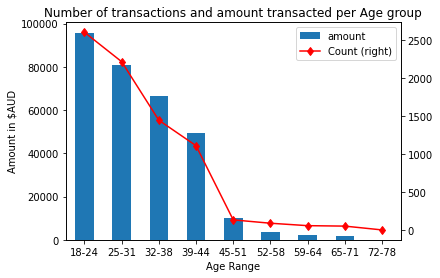

In [137]:

#POS_SALE/POS
ANZ_df['geometry'] = ANZ_df.apply(build_geometry, axis=1)
ANZ_df['longitude'] = ANZ_df.apply(build_longitude, axis=1)
ANZ_df['latitude'] = ANZ_df.apply(build_latitude, axis=1)

anz_transactions_pos_pos_sales = ANZ_df.loc[ANZ_df['geometry'].notnull()] # Only the POS POS-SALE have geometries which are not null
anz_transactions_pos_pos_sales = geopandas.GeoDataFrame(anz_transactions_pos_pos_sales, geometry=anz_transactions_pos_pos_sales.geometry) 
#convert to geoDataframe 
anz_transactions_pos_pos_sales.crs = {'init': 'epsg:4326', 'no_defs': True}

# BIN AGE TO AGE GROUP
age_bins = np.linspace(anz_transactions_pos_pos_sales['age'].values.min(),anz_transactions_pos_pos_sales['age'].values.max(), 10)

anz_transactions_pos_pos_sales['AGE_RANGE']=anz_transactions_pos_pos_sales['age'].apply(get_range, args=(age_bins,))
age_range_bins=generate_range_bins(age_bins)

# GROUP BY AGE 



grouped_by_age_number_transacted = anz_transactions_pos_pos_sales.groupby(['AGE_RANGE']).size().to_frame('Count').reset_index() 

grouped_by_age_amount_transacted = anz_transactions_pos_pos_sales.groupby(['AGE_RANGE'])[['AGE_RANGE', 'amount']].sum().reset_index()

grouped_by_age = pd.concat([grouped_by_age_number_transacted,grouped_by_age_amount_transacted],axis=1)
grouped_by_age = grouped_by_age.loc[:,~grouped_by_age.columns.duplicated()]
grouped_by_age.set_index('AGE_RANGE',inplace=True)

fig, ax1 = plt.subplots()
grouped_by_age[['amount']].plot(ax = ax1,kind='bar')
grouped_by_age[['Count']].plot(ax = ax1,kind='line', color = 'r', marker = 'd', secondary_y=True)

ax1.set_title('Number of transactions and amount transacted per Age group')
ax1.set_xlabel('Age Range', fontsize=10)
ax1.set_ylabel('Amount in $AUD', fontsize=10)


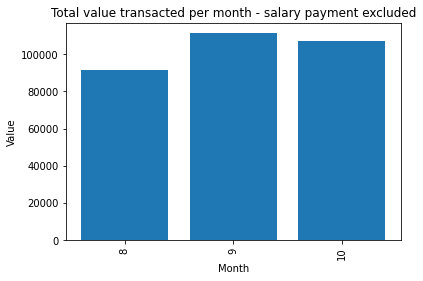

In [62]:
ANZ_df_month = anz_transactions_pos_pos_sales.date.dt.month
title_month = "Total value transacted per month - salary payment excluded" 
grouped_month = anz_transactions_pos_pos_sales[['date','weekday', 'amount']].groupby(ANZ_df_month).sum().reset_index()




plot_bar_plot(grouped_month.date, grouped_month.amount, 'Month', 'Value',title_month, False)


AVERAGE MALE SALARY:  2096.811681034483
AVERAGE FEMALE SALARY:  1679.370477326969
---------------------------------------------
<ipython-input-118-8d42e3063918>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  salary_trans['SALARY_RANGE'] = salary_trans['amount'].apply(get_range, args=(salary_bins,)) #Add range column to dataframe


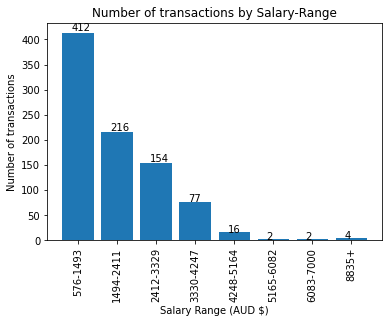

In [118]:
# SALARY:
salary_trans = ANZ_df[ANZ_df['txn_description'] == 'PAY/SALARY'] #Get salary info 
salary_trans['AGE_RANGE']=salary_trans['age'].apply(get_range, args=(age_bins,))
male_salary=salary_trans[salary_trans['gender']=='M'] #Get male salary info
female_salary=salary_trans[salary_trans['gender']=='F'] #get female salary info 
average_male_salary=male_salary['amount'].values.mean() 
average_female_salary=female_salary['amount'].values.mean()
print('AVERAGE MALE SALARY: ', average_male_salary)
print('AVERAGE FEMALE SALARY: ', average_female_salary)
print('---------------------------------------------')


#BIN SALARY TO SALARY-GROUP
salary_bins = np.linspace(salary_trans.amount.values.min(), salary_trans.amount.values.max(), 10) #Create bins for salary 
salary_range_bins = generate_range_bins(salary_bins) #Generate bins 
salary_trans['SALARY_RANGE'] = salary_trans['amount'].apply(get_range, args=(salary_bins,)) #Add range column to dataframe 

grouped_by_salary = group_by_data(salary_trans,['SALARY_RANGE']) #Group data by salary range 

grouped_salary = list(grouped_by_salary['SALARY_RANGE']) #Create list of range 

grouped_salary_count=list(grouped_by_salary['count']) #Create list containing value count in each range 

grouped_salary, grouped_salary_count=sort_ranges(salary_range_bins, grouped_salary, grouped_salary_count) #sort it

plot_bar_plot(grouped_salary, grouped_salary_count, 'Salary Range (AUD $)', 'Number of transactions','Number of transactions by Salary-Range',True)


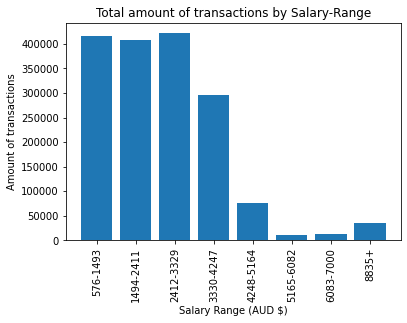

In [40]:
grouped_by_salary_amount =  salary_trans[['SALARY_RANGE', 'amount']].groupby(['SALARY_RANGE']).sum().reset_index()

grouped_salary = list(grouped_by_salary_amount['SALARY_RANGE']) #Create list of range 

grouped_salary_amount=list(grouped_by_salary_amount['amount']) #Create list containing value count in each range 

grouped_salary, grouped_salary_amount=sort_ranges(salary_range_bins, grouped_salary, grouped_salary_amount) #sort it

plot_bar_plot(grouped_salary, grouped_salary_amount, 'Salary Range (AUD $)', 'Amount of transactions','Total amount of transactions by Salary-Range',False)


       customer_id   amount
46  CUS-2487424745  9819.21
7   CUS-1271030853  9705.68
36  CUS-2142601169  9685.76
55  CUS-2695611575  7558.12
84  CUS-4142663097  7192.98


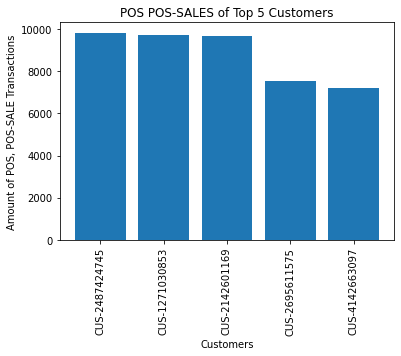

In [7]:
grouped_customer = anz_transactions_pos_pos_sales[['first_name', 'customer_id', 'amount']].groupby(['customer_id']).sum().reset_index()
top_5_pos_pos_sale_customers = grouped_customer.reset_index(drop=True).sort_values('amount', ascending=False).head(5)
print(top_5_pos_pos_sale_customers)
plot_bar_plot(top_5_pos_pos_sale_customers['customer_id'].values, top_5_pos_pos_sale_customers['amount'].values, 'Customers', 'Amount of POS, POS-SALE Transactions', 'POS POS-SALES of Top 5 Customers',False)

Text(0.5, 1.0, 'Total amount transacted in August per day')

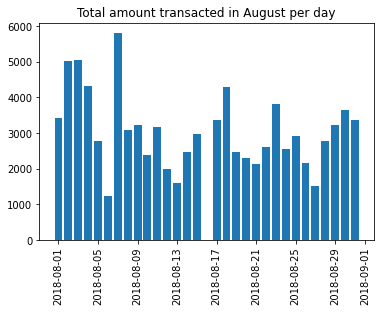

In [45]:
ANZ_df_Aug = anz_transactions_pos_pos_sales.loc[ANZ_df.date.dt.month == 8]

grouped_date_aug = ANZ_df_Aug[['date','weekday', 'amount']].groupby(['date']).sum().reset_index()

fig, ax = plt.subplots()
ax.bar(grouped_date_aug['date'].values, grouped_date_aug['amount'].values,)

plt.xticks(rotation=90, horizontalalignment="center")

ax.set_title('Total amount transacted in August per day')






Text(0.5, 1.0, 'Total amount transacted in September per day')

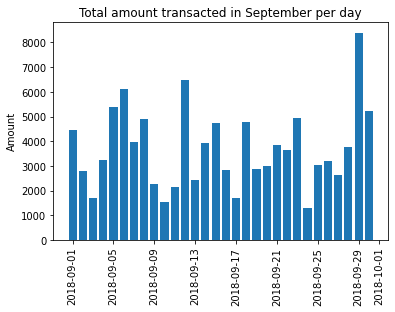

In [43]:
ANZ_df_Sep = anz_transactions_pos_pos_sales.loc[ANZ_df.date.dt.month == 9]
grouped_date_sep = ANZ_df_Sep[['date','weekday', 'amount']].groupby(['date']).sum().reset_index()
fig, ax = plt.subplots()
ax.bar(grouped_date_sep['date'].values, grouped_date_sep['amount'].values,)

ax.set_ylabel("Amount", fontsize=10)
plt.xticks(rotation=90, horizontalalignment="center")

ax.set_title('Total amount transacted in September per day')



Text(0.5, 1.0, 'Total amount transacted in October per day')

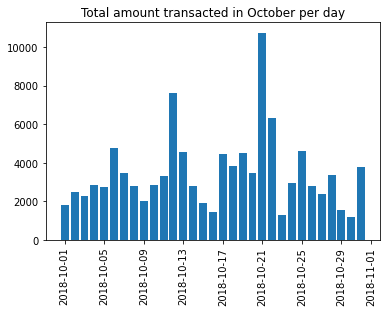

In [42]:
ANZ_df_Oct = anz_transactions_pos_pos_sales.loc[ANZ_df.date.dt.month == 10]
grouped_date_oct = ANZ_df_Oct[['date','weekday', 'amount']].groupby(['date']).sum().reset_index()
fig, ax = plt.subplots()
ax.bar(grouped_date_oct['date'].values, grouped_date_oct['amount'].values,)
plt.xticks(rotation=90, horizontalalignment="center")
ax.set_title('Total amount transacted in October per day')



Text(0, 0.5, 'Amount of money in AUD')

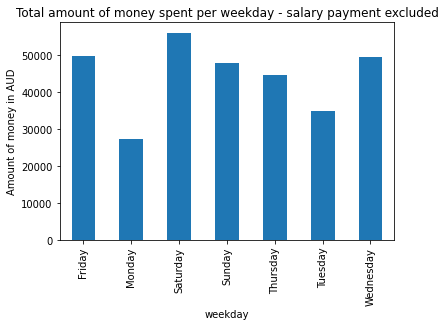

In [49]:
ax = anz_transactions_pos_pos_sales[['weekday', 'amount']].groupby(['weekday']).sum().plot(kind='bar', legend=None)
ax.set_title('Total amount of money spent per weekday - salary payment excluded')
ax.set_ylabel('Amount of money in AUD')